In [2]:
import numpy as np
import os

import random
import pandas as pd
import math
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import astropy.units as u

import astropy.constants as const
import scipy.stats
from matplotlib.lines import Line2D
from scipy import integrate
import matplotlib.ticker as mtick

In [3]:
import sys
from s1s2_0311 import *
from read import *
from recoil_1223 import *


NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
survival
NR
else
_smear ../real_data_nest/pdf/8B_NR_Xenon_pdf_high_smear.txt
NR_Xe100_5_thrd0_S1S2
survival
NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_low.txt
survival
NR
else
_smear ../real_data_nest/pdf/8B_NR_Xenon_pdf_low_smear.txt
NR_Xe100_5_thrd0_S1S2
survival
[]
more than one file selected 


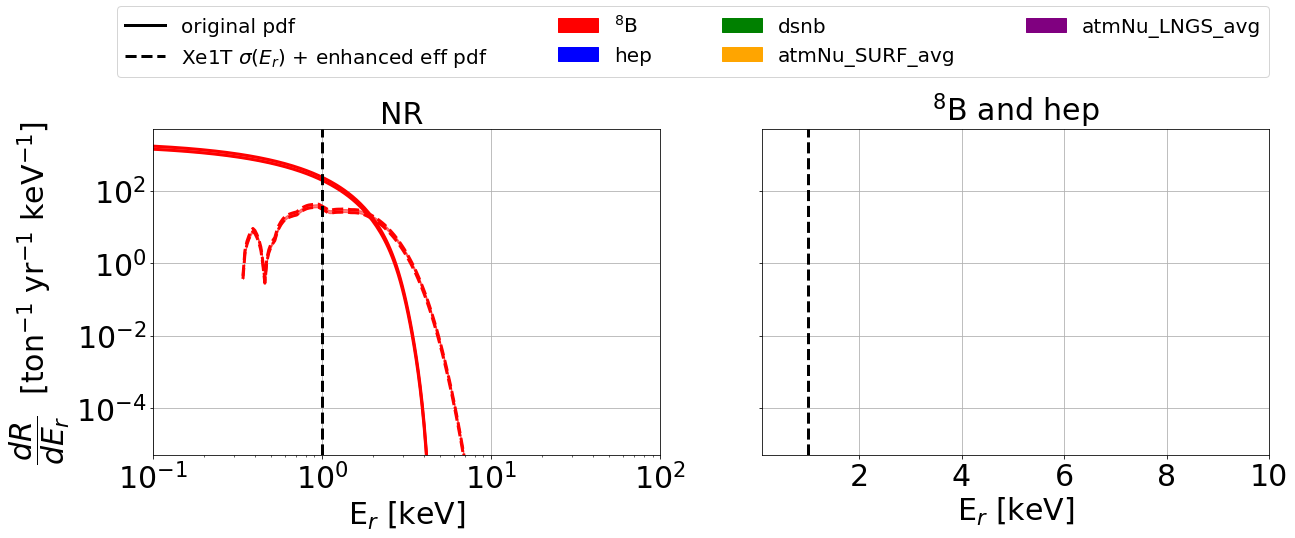

In [8]:
pcles = ['8B', 'hep', 'dsnb', 'atmNu_SURF_avg', 'atmNu_LNGS_avg']
nuclei = 'Xenon'
metallicities = ['high', 'low']
colors = ['red', 'blue', 'green', 'orange', 'purple']
E_threshold_keV = 0.1
eff_type = 'Xe100_5_eff_eh_S1S2'
lines = ['-', '--']
custom_lines= [Line2D([0], [0], lw=3,  color ='black',ls = l) for l in lines]+[
    Patch(color =c) for c in colors]

custom_labels = ['original pdf', 'Xe1T $\sigma(E_{r})$ + enhanced eff pdf'] + [r'$^{8}$B']+pcles[1:]

folder1d = 'unbinned_Er_pdf_itp'
numevent1d = 10000

folder2d = 'nestpy_unbinned'
numevent2d = 100000
footnote = 'thrd'
fig, ax = plt.subplots(1, 2, figsize = (10*2, 6), sharey = True)
marker_handles = []
for p, pcle in enumerate(pcles):
    if pcle in ['8B', 'hep']:
        matal_pdf, matal_smearpdf, matal_smearpdf_xe1t = [],[],[]
    for m, metallicity in enumerate(metallicities):
        exposure, Er_end, Er_keV, pdf,_,_ = read_pcle_cdf(pcle, nuclei, E_threshold_keV, '', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '')
        
        exposure_smear, Er_end_smear, Er_keV_smear, pdf_smear,_,_ = read_pcle_cdf(pcle, nuclei, E_threshold_keV, 
                                                                    'NR_Xe100_5_thrd0_S1S2', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '_smear')

        if pcle in ['8B', 'hep']:
            matal_pdf.append(pdf)
            matal_smearpdf.append(pdf_smear)
            #matal_smearpdf_xe1t.append(pdf_smear_xe1t)
        ax[0].loglog(Er_keV, pdf, color = colors[p], lw = 3, ls = '-')
        ax[0].loglog(Er_keV_smear, pdf_smear, color = colors[p], lw = 3, ls = '--')
        #ax[0].loglog(Er_keV_smear_xe1t, pdf_smear_xe1t, color = colors[p], lw = 3, ls = ':')
    if pcle in ['8B', 'hep']:
        ax[0].fill_between(Er_keV, matal_pdf[0], matal_pdf[1], color = colors[p], alpha = 0.5)
        ax[0].fill_between(Er_keV_smear, matal_smearpdf[0], matal_smearpdf[1], color = colors[p], alpha = 0.5)
        #ax[0].fill_between(Er_keV_smear_xe1t, matal_smearpdf_xe1t[0], matal_smearpdf_xe1t[1], color = colors[p], alpha = 0.5)
        bins = np.logspace(-1, 1, 30)
        bins_center = (bins[:-1]+bins[1:])/2
        files = glob.glob(os.path.join(folder1d,'Er*'+pcle+'*'+nuclei+'*'+eff_type+'*'+str(numevent1d)+'*'+'_sim.txt'))
        print(files)
        if len(files) == 1:
            data = np.array(read_file_dataline(files[0]))
        else:
            print('more than one file selected ')
            break
        E_true = data.T[0]
        E_smear = data.T[2]

        counts_smear, _, _ = ax[1].hist(E_smear, bins, log = True, density = True, alpha = 0.)

        dataS1S2, num = get_data(folder2d, pcle, nuclei, numevent2d, 'thrd')
        E_S1S2reconst = dataS1S2.T[0]
        #E_S1S2true = dataS1S2.T[-1]

        counts_reconst, _, _ = ax[1].hist(E_S1S2reconst, bins, log = True, density = True, alpha = 0.)

        exposure, Er_end, Er_keV, pdf,_,cdf = read_pcle_cdf(pcle, nuclei, E_threshold_keV, '', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '')

        exposure_smear, Er_end_smear, Er_keV_smear, pdf_smear,_,cdf_smear = read_pcle_cdf(pcle, nuclei, E_threshold_keV, 
                                                                    'NR_Xe100_5_thrd0_S1S2', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '_smear')


        
        ax[1].semilogx(Er_keV_smear, pdf_smear, color = colors[p], lw = 3, ls = '--')

        marker_handles.append(ax[1].bar(bins_center, counts_smear*max(cdf_smear).value, width=np.diff(bins), log=True, 
               align='center', facecolor = colors[p], edgecolor = colors[p], fill = False, lw = 1, 
                  label = pcle +r' E$_{smear}$'))
        marker_handles.append(ax[1].bar(bins_center, counts_reconst*max(cdf_smear).value, width=np.diff(bins), log=True,
               align='center',facecolor = colors[p], edgecolor = colors[p], fill = True, alpha = 0.3, 
                                   label = pcle +r' S1S2 E$_{reconst}$'))
        


ax[0] = setup_cdfpdf_ax(ax[0], 'NR ', r'E$_{r}$ [keV]', '', True, 'pdf', 30, 30, 
                    vlines = [1], hlines = [0], xlims = [0.1,100], ylims = [5e-6,5e3], log = [0,0])
ax[1] = setup_cdfpdf_ax(ax[1], r'$^{8}$B and hep', r'E$_{r}$ [keV]', '', True, '', 30, 30, 
                    vlines = [1], hlines = [0], xlims = [0.1,10], ylims = [0,0], log = [0,0])
fig.legend(custom_lines+marker_handles, custom_labels+[r'$^{8}$B E$_{smear}$', r'$^{8}$B S1S2 E$_{reconst}$',
                                                       r'hep E$_{smear}$', r'hep S1S2 E$_{reconst}$'],
           bbox_to_anchor=(0.1, 1, 0.8, .102), loc='lower left',
           ncol=4, mode="expand", borderaxespad=0., fontsize = 20)


In [8]:
save_path = os.path.join('phys685', 'nestfig')
save_name = os.path.join(save_path, 'NR_smearEpdf_Ehist.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



phys685/nestfig/NR_smearEpdf_Ehist.pdf


NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
survival
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_high_smear.txt
survival
NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_low.txt
survival
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_low_smear.txt
survival
['unbinned_Er_pdf_itp/Er_8B_NR_Xenon_Xe100_5_eff_eh_S1S2_10000_thrd0keV_high_sim.txt']
NR
else
 ./real_data_nest/pdf/8B_NR_Xenon_pdf_low.txt
survival
NR
else
_smear ./real_data_nest/pdf/8B_NR_Xenon_pdf_low_smear.txt
survival
NR
else
 ./real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
NR
else
_smear ./real_data_nest/pdf/hep_NR_Xenon_pdf_high_smear.txt
survival
NR
else
 ./real_data_nest/pdf/hep_NR_Xenon_pdf_low.txt
survival
NR
else
_smear ./real_data_nest/pdf/hep_NR_Xenon_pdf_low_smear.txt
survival
['unbinned_Er_pdf_itp/Er_hep_NR_Xenon_Xe100_5_eff_eh_S1S2_10000_thrd0keV_high_sim.txt']
NR
else
 ./real_data_nest/pdf/hep_NR_Xenon_pdf_low.txt
survival
NR
else
_smear ./real_data_nest/pdf/hep_NR_Xenon_pdf_low_smear.

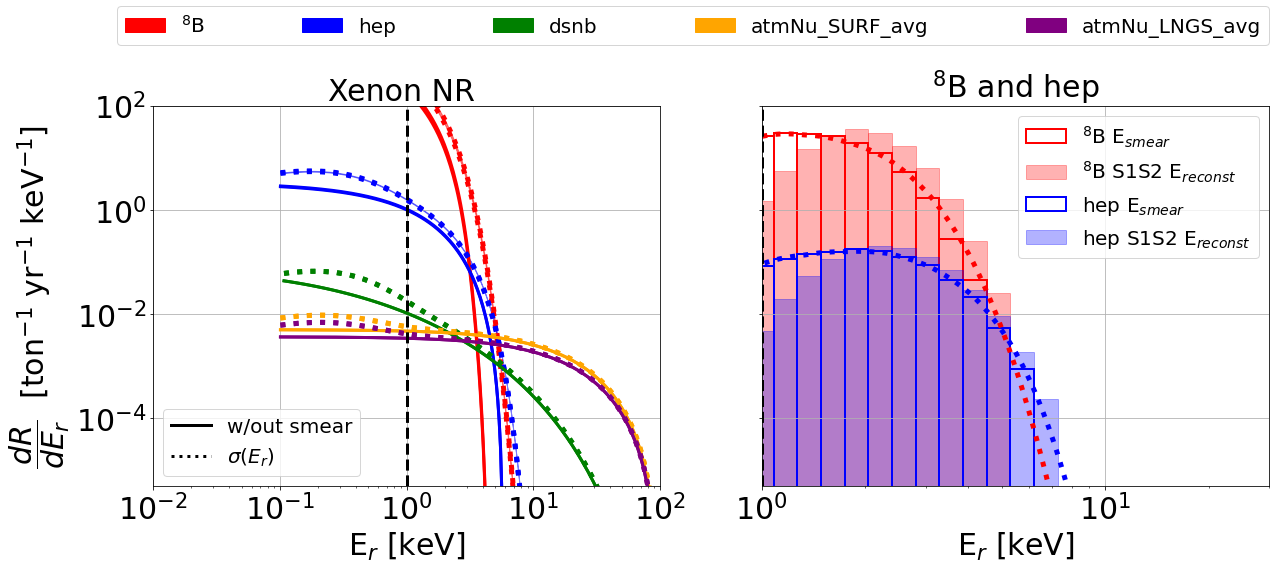

In [4]:
pcles = ['8B', 'hep', 'dsnb', 'atmNu_SURF_avg', 'atmNu_LNGS_avg']
nuclei = 'Xenon'
metallicities = ['high', 'low']
colors = ['red', 'blue', 'green', 'orange', 'purple']
E_threshold_keV = 0.1
eff_type = ''
lines = ['-', ':']
custom_lines= [Line2D([0], [0], lw=3,  color ='black',ls = l) for l in lines]
line_labels = ['w/out smear', '$\sigma(E_{r})$ ']

custom_colors = [Patch(color =c) for c in colors]
color_labels = [r'$^{8}$B']+pcles[1:]

folder1d = 'unbinned_Er_pdf_itp'
numevent1d = 10000

folder2d = 'nestpy_unbinned'
numevent2d = 100000
footnote = 'thrd'
fig, ax = plt.subplots( 1,2,figsize = (10*2, 7), sharey = True)
marker_handles = []
for p, pcle in enumerate(pcles):
    if pcle in ['8B', 'hep']:
        matal_pdf, matal_smearpdf= [],[]
    for m, metallicity in enumerate(metallicities):
        exposure, Er_end, Er_keV, pdf,_,_ = read_pcle_cdf(pcle, nuclei, E_threshold_keV, eff_type, recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '')
        
        exposure_smear, Er_end_smear, Er_keV_smear, pdf_smear,_,_ = read_pcle_cdf(pcle, nuclei, E_threshold_keV, 
                                                                    eff_type, recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '_smear')
        

        if pcle in ['8B', 'hep']:
            matal_pdf.append(pdf)
            matal_smearpdf.append(pdf_smear)

        ax[0].loglog(Er_keV, pdf, color = colors[p], lw = 3, ls = '-')
        ax[0].loglog(Er_keV_smear, pdf_smear, color = colors[p], lw = 5, ls = ':')
     
    if pcle in ['8B', 'hep']:
        ax[0].fill_between(Er_keV, matal_pdf[0], matal_pdf[1], color = colors[p], alpha = 0.5)
        ax[0].fill_between(Er_keV_smear, matal_smearpdf[0], matal_smearpdf[1], color = colors[p], alpha = 0.5)
        
        bins = np.logspace(-1, 1, 30)
        bins_center = (bins[:-1]+bins[1:])/2
        files = glob.glob(os.path.join(folder1d,'Er*'+pcle+'*'+nuclei+'*'+eff_type+'*'+str(numevent1d)+'*'+'_sim.txt'))
        print(files)
        if len(files) == 1:
            data = np.array(read_file_dataline(files[0]))
        else:
            print('more than one file selected ')
            break
        E_true = data.T[0]
        E_smear = data.T[2]

        counts_smear, _, _ = ax[1].hist(E_smear, bins, log = True, density = True, alpha = 0.)

        dataS1S2, num = get_data(folder2d, pcle, nuclei, numevent2d, 'thrd')
        E_S1S2reconst = dataS1S2.T[0]
        #E_S1S2true = dataS1S2.T[-1]

        counts_reconst, _, _ = ax[1].hist(E_S1S2reconst, bins, log = True, density = True, alpha = 0.)

        exposure, Er_end, Er_keV, pdf,_,cdf = read_pcle_cdf(pcle, nuclei, E_threshold_keV, '', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '')

        exposure_smear, Er_end_smear, Er_keV_smear, pdf_smear,_,cdf_smear = read_pcle_cdf(pcle, nuclei, E_threshold_keV, 
                                                                    'Xe100_5_eff_eh_S1S2', recoil_type = '',
                  read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                      plot_pdf = False, corr = '_smear')


        
        ax[1].semilogx(Er_keV_smear, pdf_smear, color = colors[p], lw = 5, ls = ':')

        marker_handles.append(ax[1].bar(bins_center, counts_smear*max(cdf_smear).value, width=np.diff(bins), log=True, 
               align='center', facecolor = colors[p], edgecolor = colors[p], fill = False, lw = 2, 
                  label = pcle +r' E$_{smear}$'))
        marker_handles.append(ax[1].bar(bins_center, counts_reconst*max(cdf_smear).value, width=np.diff(bins), log=True,
               align='center',facecolor = colors[p], edgecolor = colors[p], fill = True, alpha = 0.3, 
                                   label = pcle +r' S1S2 E$_{reconst}$'))
        


ax[0] = setup_cdfpdf_ax(ax[0], 'Xenon NR ', r'E$_{r}$ [keV]', '', True, 'pdf', 30, 30, 
                    vlines = [1], hlines = [0], xlims = [0.01,100], ylims = [5e-6,100], log = [0,0])
ax[0].legend(custom_lines, line_labels, fontsize = 20)

ax[1] = setup_cdfpdf_ax(ax[1], r'$^{8}$B and hep', r'E$_{r}$ [keV]', '', True, '', 30, 30, 
                    vlines = [1], hlines = [0], xlims = [1,30], ylims = [0,0], log = [0,0])
ax[1].legend(marker_handles, [r'$^{8}$B E$_{smear}$', 
              r'$^{8}$B S1S2 E$_{reconst}$',
              r'hep E$_{smear}$', 
              r'hep S1S2 E$_{reconst}$'], fontsize = 20)
fig.legend(custom_colors, color_labels,
           bbox_to_anchor=(0.1, 1, 0.8, .102), loc='lower left',
           ncol=5, mode="expand", borderaxespad=0., fontsize = 20)


NR
else
 ../real_data_nest/pdf/8B_NR_Xenon_pdf_high.txt
survival
NR
else
_smear ../real_data_nest/pdf/8B_NR_Xenon_pdf_high_smear.txt
NR_Xe100_S1S2
survival
NR
else
 ../real_data_nest/pdf/hep_NR_Xenon_pdf_high.txt
survival
NR
else
_smear ../real_data_nest/pdf/hep_NR_Xenon_pdf_high_smear.txt
NR_Xe100_S1S2
survival


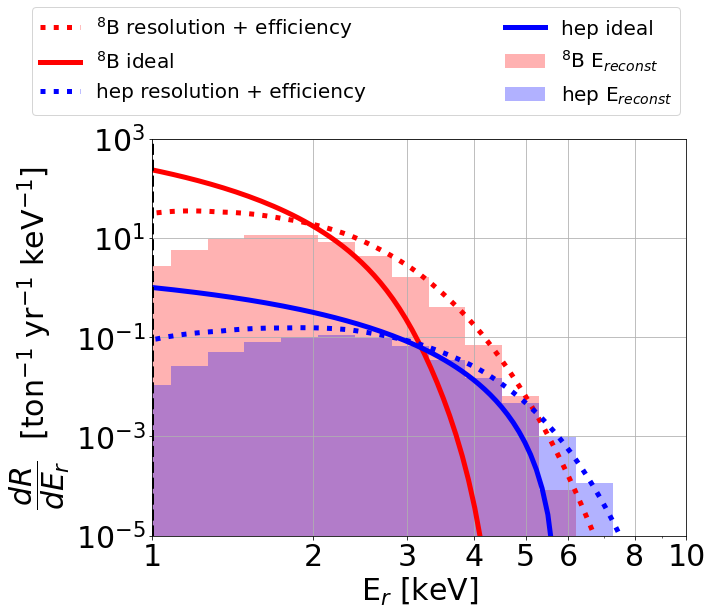

In [17]:
pcles = ['8B', 'hep']
nuclei = 'Xenon'
metallicity = 'high'
colors = ['red', 'blue']
E_threshold_keV = 0.1
eff_type = ''
lines = ['-', ':']

folder1d = '../unbinned_Er_pdf_itp'
numevent1d = 10000

folder2d = '../nestpy_unbinned_unbound_thrd0'

fig, ax = plt.subplots( figsize = (10, 7))
marker_handles = []

for p, pcle in enumerate(pcles):

    marker_handles.append(Patch(color =colors[p]))
    #ax.loglog(Er_keV_smear, pdf_smear, color = colors[p], lw = 5, ls = ':')
    
   
    
    bins = np.logspace(-1, 1, 30)
    bins_center = (bins[:-1]+bins[1:])/2
    
    
    exposure, Er_end, Er_keV, pdf,_,cdf = read_pcle_cdf(pcle, nuclei, E_threshold_keV, '', recoil_type = '',
              read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                  plot_pdf = False, corr = '')

    exposure_smear, Er_end_smear, Er_keV_smear, pdf_smear,_,cdf_smear = read_pcle_cdf(pcle, nuclei, E_threshold_keV, 
                                                                'NR_Xe100_S1S2', recoil_type = '',
              read_pdf = True, Er_keV = 0, pdf = 0, endpt = -1, metallicity = metallicity, ebind = True, 
                                                  plot_pdf = False, corr = '_smear')
    
    
    ax.loglog(Er_keV_smear, pdf_smear, color = colors[p], lw = 5, ls = ':',
              label = get_official_pcle(pcle) + ' resolution + efficiency')
    ax.loglog(Er_keV, pdf, color = colors[p], lw = 5, ls = '-', label =get_official_pcle(pcle) + ' ideal')
    
    S1S2file = glob.glob(os.path.join(folder2d, '*'+pcle+'*txt'))[0]
    E_reconst, _,_,_,_,_ = read_file_dataline(S1S2file)
    valid = E_reconst>0
    
    counts_reconst, _ = np.histogram(E_reconst[valid], bins)
    marker_handles.append(ax.bar(bins_center, (counts_reconst/len(E_reconst)*exposure/np.diff(bins)).value, np.diff(bins),
           color = colors[p], alpha = 0.3, label = get_official_pcle(pcle)  +r' E$_{reconst}$'))

ax = setup_cdfpdf_ax(ax, '', r'E$_{r}$ [keV]', '', True, 'pdf', 30, 30, #r'Xe NR $^{8}$B and hep, high metallicity '
                 vlines = [1], hlines = [0], xlims = [1,10], ylims = [1e-5,1000], log = [0,0])


ax.set_xticks([1, 2, 3, 4, 5, 6, 8, 10])
formatter = mtick.ScalarFormatter()
formatter.set_scientific(False)
ax.xaxis.set_major_formatter(formatter)


handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))



fig.legend(by_label.values(), by_label.keys(), 
           bbox_to_anchor=(0.05, 1, 0.9, .102), loc='lower left',
           ncol=2, mode="expand", borderaxespad=0., fontsize = 20)
fig.tight_layout()

In [19]:
save_path = os.path.join('../phys685', 'nestfig')
save_name = os.path.join(save_path, 'NR_smearEpdf_Ereconst.pdf')

print(save_name)
fig.savefig(save_name , bbox_inches='tight')



../phys685/nestfig/NR_smearEpdf_Ereconst.pdf
